In [43]:
import json
import tensorflow as tf
from keras.models import Sequential
from keras.utils import image_dataset_from_directory
from keras.layers import InputLayer, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Rescaling, RandomFlip, RandomRotation
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os

## Criando dataset e verificando as imagens

### Verificando as imagens de cada classe no dataset

In [ ]:
classes: list[str] = []

with open('land_use_images\\label_map.json', 'rb') as f:
    classes = json.loads(f.read())

classes = [x for x in classes.keys()]

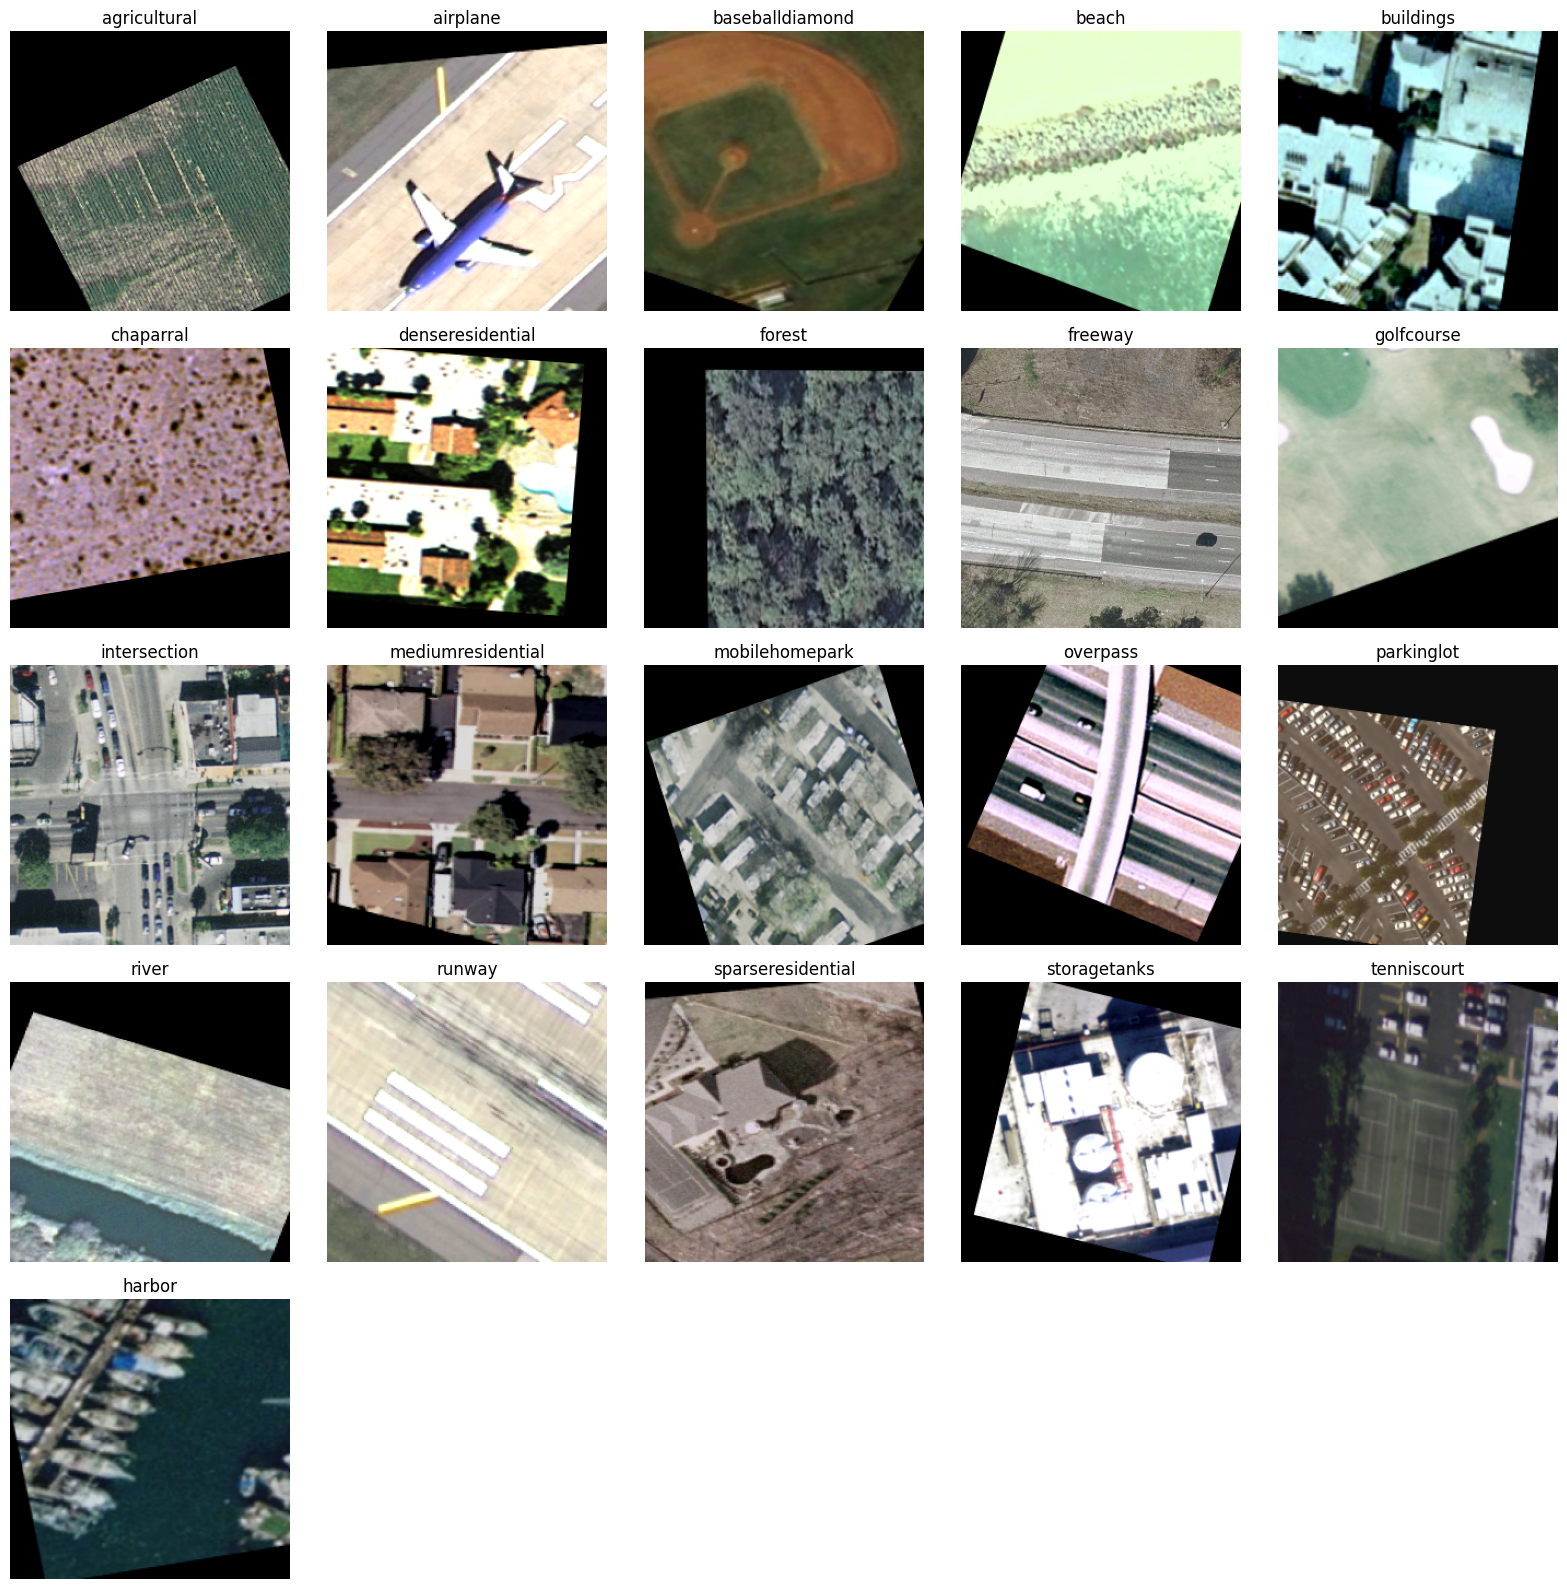

In [49]:
plt.figure(figsize=(16, 16))

for index, class_name in enumerate(classes):
    directory_path = f'land_use_images\\images\\{class_name}'
    images = os.listdir(directory_path)

    image = cv.imread(f'{directory_path}\\{images[0]}')
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    plt.subplot(5, 5, index + 1)
    plt.imshow(image)
    plt.title(f'{class_name}')
    plt.axis('off')

plt.tight_layout()
plt.show()


### Criando datasets para treinamento e testes da rede neural

In [5]:
#Carregando dataset de treino
train_dataset: tf.data.Dataset = image_dataset_from_directory(
    "land_use_images\\images_train_test_val\\train"
)

Found 7350 files belonging to 21 classes.


In [6]:
#Carregando dataset de teste
test_dataset: tf.data.Dataset = image_dataset_from_directory(
    "land_use_images\\images_train_test_val\\test"
)

Found 1050 files belonging to 21 classes.


In [7]:
#Carregando dataset de validação
validation_dataset: tf.data.Dataset = image_dataset_from_directory(
    "land_use_images\\images_train_test_val\\validation"
)

Found 2100 files belonging to 21 classes.


## Criando o modelo

In [9]:
model = Sequential()
(image_width, image_height) = 256, 256

input_shape = (image_width, image_height, 3)
model.add(InputLayer(shape=input_shape))
model.add(Rescaling(1./255))
model.add(RandomFlip("horizontal_and_vertical"))
model.add(RandomRotation(0.2))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(units=384, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=21, activation='softmax'))

In [10]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Treinamento do modelo

In [11]:
traning_scores = model.fit(train_dataset, epochs=30, validation_data=validation_dataset)

Epoch 1/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 122s 523ms/step - accuracy: 0.0622 - loss: 2.9692 - val_accuracy: 0.1871 - val_loss: 2.4996
Epoch 2/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 115s 502ms/step - accuracy: 0.2140 - loss: 2.3633 - val_accuracy: 0.3376 - val_loss: 1.9518
Epoch 3/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 114s 496ms/step - accuracy: 0.3717 - loss: 1.8553 - val_accuracy: 0.4686 - val_loss: 1.5491
Epoch 4/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 115s 499ms/step - accuracy: 0.4794 - loss: 1.5463 - val_accuracy: 0.5400 - val_loss: 1.3758
Epoch 5/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 115s 499ms/step - accuracy: 0.5412 - loss: 1.3447 - val_accuracy: 0.6081 - val_loss: 1.1689
Epoch 6/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 118s 512ms/step - accuracy: 0.6038 - loss: 1.1991 - val_accuracy: 0.5895 - val_loss: 1.1838
Epoch 7/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 117s 507ms/step - accuracy: 0.6190 - loss: 1.1285 - val_accuracy: 0.6676 - val_loss: 0.9887
Epoch 8/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 116s 503ms/step - accuracy: 0.6453 -

### Analisando o desempenho do modelo graficamente

##### Gráfico de acurácia de treinamento X acurácia de validação

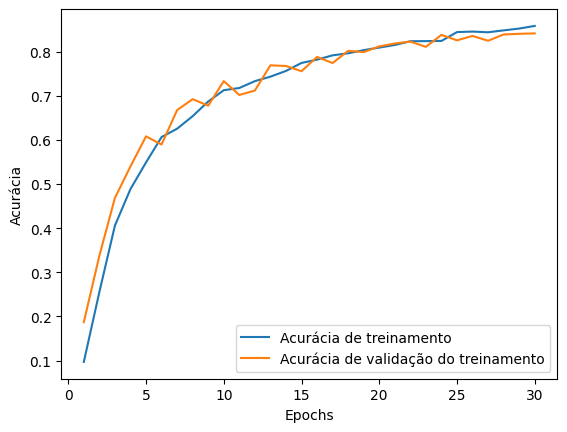

In [64]:
traning_scores_dict = traning_scores.history

accuracy_values = traning_scores_dict['accuracy']
accuracy_values_val = traning_scores_dict['val_accuracy']
epochs = range(1, 31)

acurracy_line = plt.plot(epochs, accuracy_values, label='Acurácia de treinamento')
acuracy_val_line = plt.plot(epochs, accuracy_values_val, label='Acurácia de validação do treinamento')
plt.xlabel("Epochs")
plt.ylabel("Acurácia")
plt.legend()
plt.show()


##### Gráfico de loss de treinamento X loss de validação

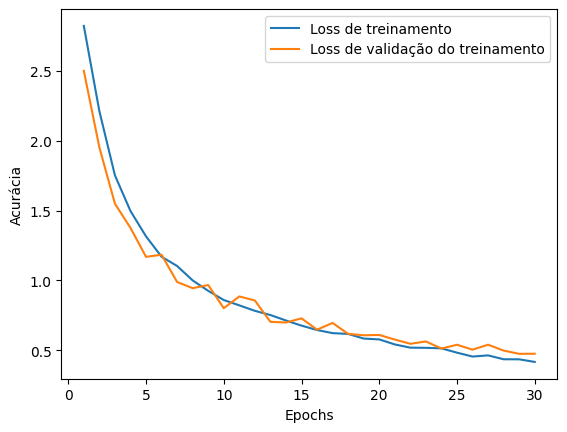

In [65]:
traning_scores_dict = traning_scores.history

accuracy_values = traning_scores_dict['loss']
accuracy_values_val = traning_scores_dict['val_loss']
epochs = range(1, 31)

acurracy_line = plt.plot(epochs, accuracy_values, label='Loss de treinamento')
acuracy_val_line = plt.plot(epochs, accuracy_values_val, label='Loss de validação do treinamento')
plt.xlabel("Epochs")
plt.ylabel("Acurácia")
plt.legend()
plt.show()

## Resultados e validação

##### Acurácia geral comparando com a base de teste

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8191 - loss: 0.5198


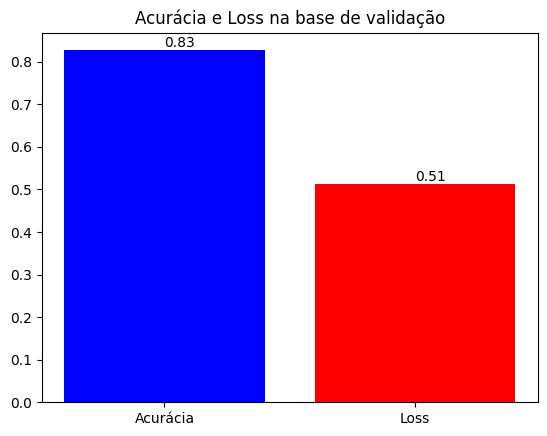

In [63]:
scores = model.evaluate(test_dataset)
scores.reverse()

labels = ['Acurácia', 'Loss']
colors = ['blue', 'red']
fig, ax = plt.subplots()
bars = ax.bar(labels, scores, color=colors)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.title('Acurácia e Loss na base de teste')
plt.show()